<a href="https://colab.research.google.com/github/AbiXnash/HGCNN-LSTM-A-Data-driven-Approach-for-Cyber-Attack-Detection-in-Cyber-Physical-Systems/blob/main/SWAT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 398, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import shuffle
from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import random
import tensorflow as tf
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SWaT_Dataset_Attack_v0.csv')

In [ ]:
print(data.columns)

Index([' Timestamp', 'FIT101', 'LIT101', ' MV101', 'P101', 'P102', ' AIT201',
       'AIT202', 'AIT203', 'FIT201', ' MV201', ' P201', ' P202', 'P203',
       ' P204', 'P205', 'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301',
       'MV302', ' MV303', 'MV304', 'P301', 'P302', 'AIT401', 'AIT402',
       'FIT401', 'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401', 'AIT501',
       'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504',
       'P501', 'P502', 'PIT501', 'PIT502', 'PIT503', 'FIT601', 'P601', 'P602',
       'P603', 'Normal/Attack'],
      dtype='object')


In [ ]:
del data[' Timestamp']
data.head()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
1,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal
2,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,Normal
3,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,Normal
4,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,2,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,Normal


In [ ]:
# Store column names
column_names = data.columns.tolist()

# Check if 'Timestamp' column exists
if ' Timestamp' or 'Normal/Attack' in column_names:
    column_names.remove('Normal/Attack')

column_names

['FIT101',
 'LIT101',
 ' MV101',
 'P101',
 'P102',
 ' AIT201',
 'AIT202',
 'AIT203',
 'FIT201',
 ' MV201',
 ' P201',
 ' P202',
 'P203',
 ' P204',
 'P205',
 'P206',
 'DPIT301',
 'FIT301',
 'LIT301',
 'MV301',
 'MV302',
 ' MV303',
 'MV304',
 'P301',
 'P302',
 'AIT401',
 'AIT402',
 'FIT401',
 'LIT401',
 'P401',
 'P402',
 'P403',
 'P404',
 'UV401',
 'AIT501',
 'AIT502',
 'AIT503',
 'AIT504',
 'FIT501',
 'FIT502',
 'FIT503',
 'FIT504',
 'P501',
 'P502',
 'PIT501',
 'PIT502',
 'PIT503',
 'FIT601',
 'P601',
 'P602',
 'P603']

In [ ]:
data.shape

(449919, 52)

In [ ]:
data.describe()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
count,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,...,449919.000000,449919.000000,449919.0,449919.000000,449919.000000,449919.000000,449919.000000,449919.0,449919.000000,449919.0
mean,1.714346,607.019967,1.665335,1.693251,1.006946,210.297302,8.528535,320.301478,1.702908,1.691584,...,0.283806,1.925862,1.0,232.173817,1.013408,174.714484,0.016566,1.0,1.009099,1.0
std,1.191716,125.303003,0.482323,0.461145,0.083051,35.157909,0.114844,16.631029,1.130277,0.470611,...,0.080924,0.261995,0.0,61.750930,0.412723,47.479809,0.159603,0.0,0.094956,0.0
min,0.000000,189.826300,0.000000,1.000000,1.000000,168.033800,6.000000,285.337100,0.000000,0.000000,...,0.000000,1.000000,1.0,9.468726,0.000000,3.140220,0.000000,1.0,1.000000,1.0
25%,0.000000,510.011100,1.000000,1.000000,1.000000,177.102000,8.441618,306.383000,0.000000,1.000000,...,0.306249,2.000000,1.0,248.029400,0.816967,186.698900,0.000000,1.0,1.000000,1.0
50%,2.477020,530.422500,2.000000,2.000000,1.000000,193.508100,8.551525,321.661100,2.446673,2.000000,...,0.306633,2.000000,1.0,249.295100,0.961138,187.724300,0.000000,1.0,1.000000,1.0
75%,2.577907,727.432100,2.000000,2.000000,1.000000,253.845200,8.610806,331.684200,2.454362,2.000000,...,0.308106,2.000000,1.0,250.881200,1.409669,189.118200,0.000128,1.0,1.000000,1.0
max,2.760145,925.032300,2.000000,2.000000,2.000000,267.719800,8.733210,384.465500,2.826899,2.000000,...,0.311693,2.000000,1.0,254.341800,1.970333,191.986000,1.802710,1.0,2.000000,1.0


In [ ]:
data['Normal/Attack'] = data['Normal/Attack'].replace('A ttack', 'Attack')
data['Normal/Attack'].value_counts()

Normal/Attack
Normal    395298
Attack     54621
Name: count, dtype: int64

In [ ]:
X = data.drop(columns = 'Normal/Attack', axis = 1)
Y = data['Normal/Attack']
X.shape, Y.shape

((449919, 51), (449919,))

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy='majority')
X_resampled, Y_resampled = undersampler.fit_resample(X, Y)

unique_classes, counts = np.unique(Y_resampled, return_counts=True)
class_distribution = dict(zip(unique_classes, counts))

print("Class Distribution after Random Undersampling:")
for class_label, count in class_distribution.items():
   print(f"{class_label}: {count}")

Class Distribution after Random Undersampling:
Attack: 54621
Normal: 54621


In [ ]:
X_resampled.shape, Y_resampled.shape

((109242, 51), (109242,))

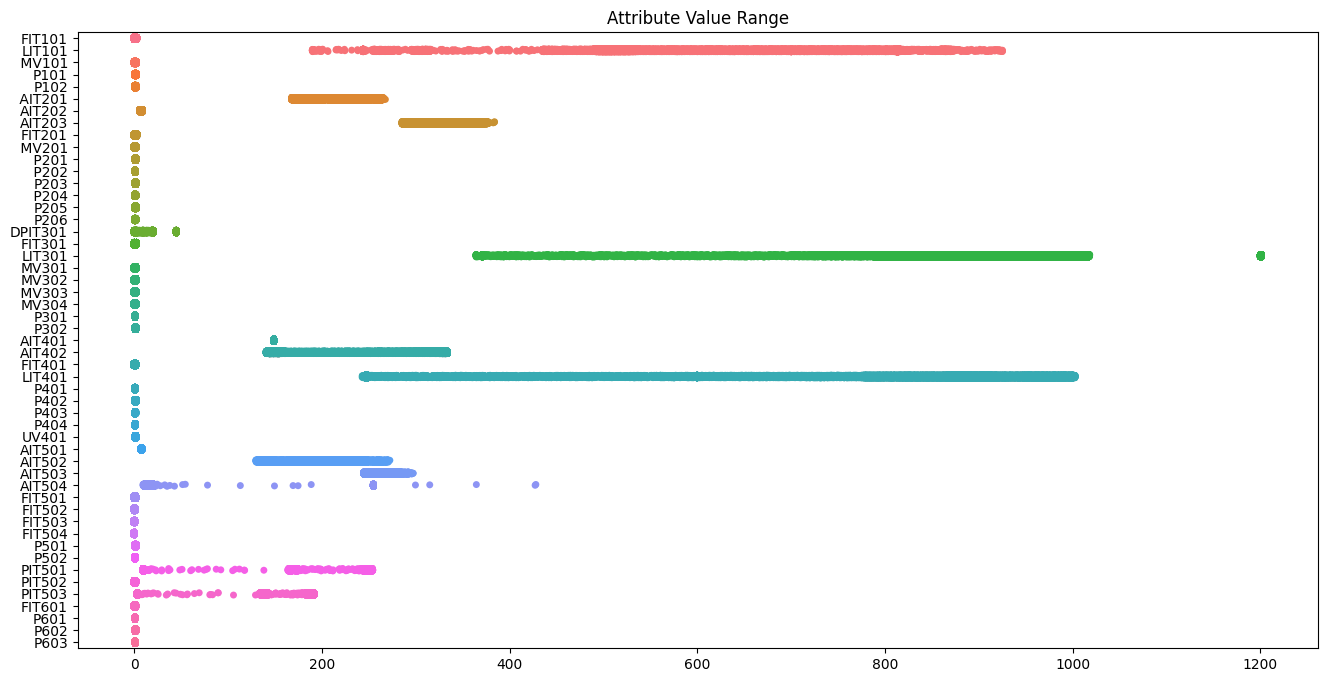

In [ ]:
plt.figure(figsize=(16, 8))
sns.stripplot(data=X_resampled, jitter=True, orient="h")
plt.title("Attribute Value Range")
plt.show()

In [ ]:
# Normalize the data in X
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_resampled)

# Encode the data in Y
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y_resampled)

In [ ]:
X_normalized_df = pd.DataFrame(X_normalized, columns=X_resampled.columns)
Y_encoded_df = pd.DataFrame({'Encoded_Target': Y_encoded})

In [ ]:
X_normalized_df.head()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
0,0.905770,0.853975,1.0,0.0,0.0,0.948892,0.901991,0.34848,0.0,0.5,...,0.988492,1.0,0.0,0.981746,0.88983,0.983117,0.000071,0.0,0.0,0.0
1,0.921126,0.854349,1.0,0.0,0.0,0.948892,0.901991,0.34848,0.0,0.5,...,0.988492,1.0,0.0,0.981746,0.88983,0.983117,0.000071,0.0,0.0,0.0
2,0.921126,0.854349,1.0,0.0,0.0,0.948892,0.901991,0.34848,0.0,0.5,...,0.988492,1.0,0.0,0.981746,0.88983,0.983117,0.000071,0.0,0.0,0.0
3,0.933457,0.855043,1.0,0.0,0.0,0.948892,0.901991,0.34848,0.0,0.5,...,0.988492,1.0,0.0,0.981746,0.88983,0.983117,0.000071,0.0,0.0,0.0
4,0.948231,0.855631,1.0,0.0,0.0,0.948892,0.901991,0.34848,0.0,0.5,...,0.988492,1.0,0.0,0.982596,0.88983,0.984050,0.000071,0.0,0.0,0.0


In [ ]:
Y_encoded_df.head()

,Encoded_Target
0,0
1,0
2,0
3,0
4,0


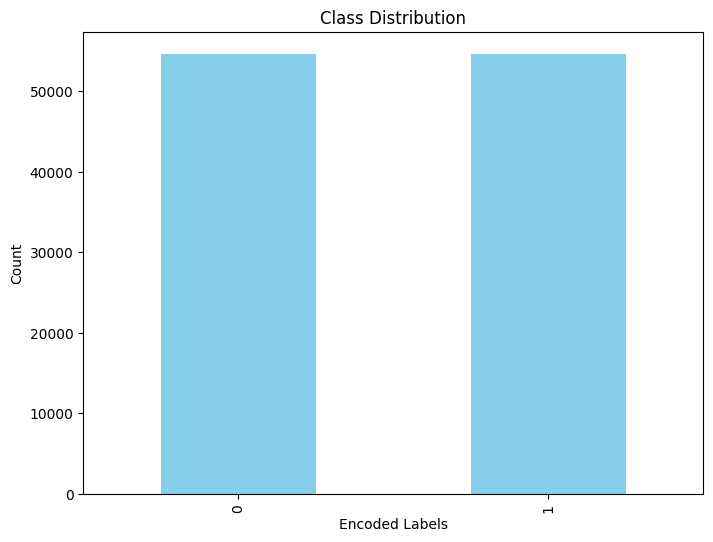

In [ ]:
# Assuming Y_encoded_df has only one column
target_counts = Y_encoded_df.iloc[:, 0].value_counts()

plt.figure(figsize=(8, 6))
target_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Encoded Labels')
plt.ylabel('Count')
plt.show()


In [ ]:
X_normalized.shape

(109242, 51)

In [ ]:
X_normalized_df = pd.DataFrame(X_normalized, columns=column_names)
X_normalized_df.describe()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
count,109242.000000,109242.000000,109242.000000,109242.000000,109242.000000,109242.000000,109242.000000,109242.000000,109242.000000,109242.000000,...,109242.000000,109242.000000,109242.0,109242.000000,109242.000000,109242.000000,109242.000000,109242.0,109242.000000,109242.0
mean,0.477564,0.638139,0.755337,0.511012,0.027837,0.389035,0.927896,0.427581,0.447393,0.757323,...,0.681191,0.695593,0.0,0.688647,0.410602,0.688961,0.007834,0.0,0.007689,0.0
std,0.461594,0.194181,0.253490,0.499881,0.164507,0.320978,0.051247,0.207657,0.436784,0.252871,...,0.454791,0.460158,0.0,0.443519,0.309511,0.442559,0.081335,0.0,0.087352,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
25%,0.000000,0.442871,0.500000,0.000000,0.000000,0.132112,0.901405,0.278110,0.000000,0.500000,...,0.000000,0.000000,0.0,0.003206,0.000000,0.004242,0.000000,0.0,0.000000,0.0
50%,0.879362,0.649384,1.000000,1.000000,0.000000,0.250723,0.938451,0.432615,0.861871,1.000000,...,0.983559,1.000000,0.0,0.976119,0.457627,0.973785,0.000000,0.0,0.000000,0.0
75%,0.926128,0.847836,1.000000,1.000000,0.000000,0.670524,0.955099,0.507920,0.867310,1.000000,...,0.984792,1.000000,0.0,0.982335,0.559322,0.981844,0.000036,0.0,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0


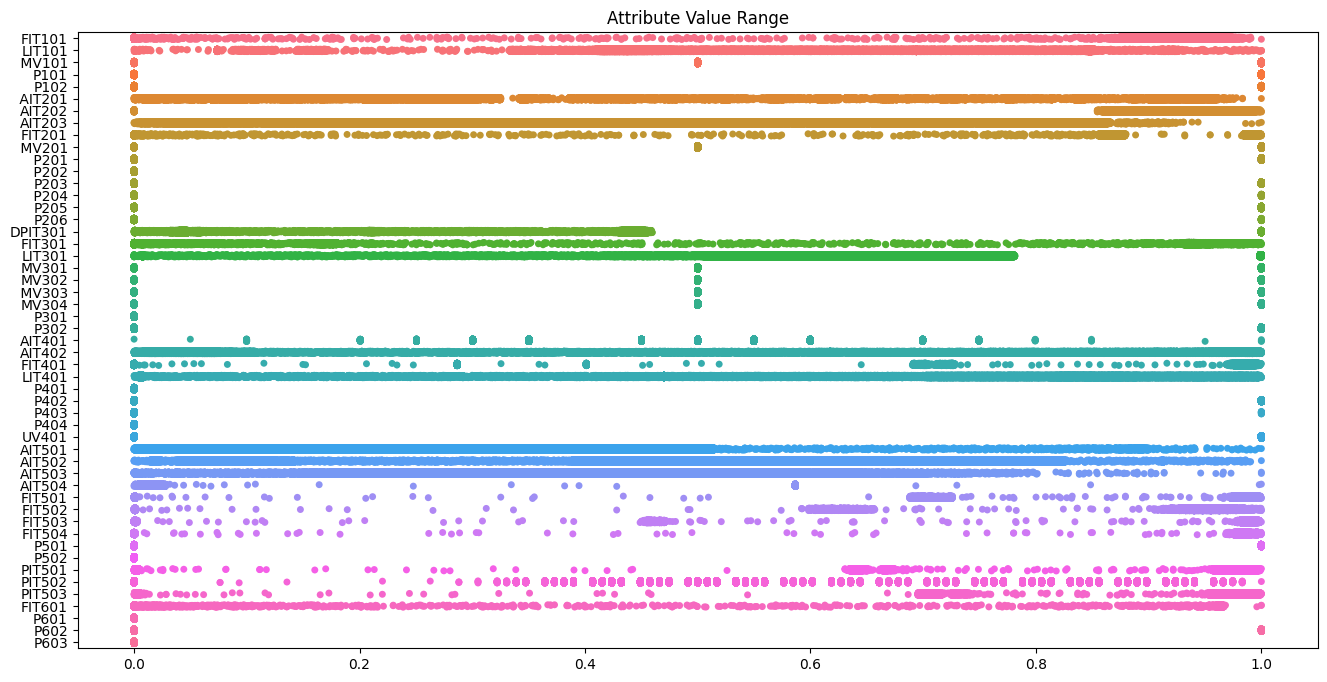

In [ ]:
plt.figure(figsize=(16, 8))
sns.stripplot(data=X_normalized_df, jitter=True, orient="h")
plt.title("Attribute Value Range")
plt.show()

In [ ]:
r, f = X_normalized_df.shape
columns = X_normalized_df.columns

In [ ]:
constant_features = X_normalized_df.columns[X_normalized_df.nunique() == 1]
X_normalized_df.drop(columns=constant_features, inplace=True)

X_normalized_df.head()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT501,FIT502,FIT503,FIT504,P501,PIT501,PIT502,PIT503,FIT601,P602
0,0.905770,0.853975,1.0,0.0,0.0,0.948892,0.901991,0.34848,0.0,0.5,...,0.984135,0.942519,0.991713,0.988492,1.0,0.981746,0.88983,0.983117,0.000071,0.0
1,0.921126,0.854349,1.0,0.0,0.0,0.948892,0.901991,0.34848,0.0,0.5,...,0.984135,0.946781,0.991713,0.988492,1.0,0.981746,0.88983,0.983117,0.000071,0.0
2,0.921126,0.854349,1.0,0.0,0.0,0.948892,0.901991,0.34848,0.0,0.5,...,0.984135,0.946781,0.991713,0.988492,1.0,0.981746,0.88983,0.983117,0.000071,0.0
3,0.933457,0.855043,1.0,0.0,0.0,0.948892,0.901991,0.34848,0.0,0.5,...,0.984135,0.953693,0.991713,0.988492,1.0,0.981746,0.88983,0.983117,0.000071,0.0
4,0.948231,0.855631,1.0,0.0,0.0,0.948892,0.901991,0.34848,0.0,0.5,...,0.984135,0.960796,0.991713,0.988492,1.0,0.982596,0.88983,0.984050,0.000071,0.0


In [ ]:
def find_dist(vector1, vector2):
    return np.sqrt(np.sum((vector1 - vector2) ** 2))

dist_arr = np.zeros((f, f))
for i in range(f):
    for j in range(f):
        dist_arr[i][j] = find_dist(X_normalized_df.iloc[i], X_normalized_df.iloc[j])

In [ ]:
dist_arr

array([[0.        , 0.01617155, 0.01617155, ..., 0.04717322, 0.0477956 ,
        0.04823   ],
       [0.01617155, 0.        , 0.        , ..., 0.05448429, 0.055756  ,
        0.05611077],
       [0.01617155, 0.        , 0.        , ..., 0.05448429, 0.055756  ,
        0.05611077],
       ...,
       [0.04717322, 0.05448429, 0.05448429, ..., 0.        , 0.0050234 ,
        0.00535202],
       [0.0477956 , 0.055756  , 0.055756  , ..., 0.0050234 , 0.        ,
        0.00164398],
       [0.04823   , 0.05611077, 0.05611077, ..., 0.00535202, 0.00164398,
        0.        ]])

In [ ]:
np.max(dist_arr)

0.11316673632002282

In [ ]:
threshold_distance = 0.1

while dist_arr.size > 0 and np.max(dist_arr) > threshold_distance:
    max_dist_feature_index = np.unravel_index(np.argmax(dist_arr, axis=None), dist_arr.shape)

    removed_feature = columns[max_dist_feature_index[1]]
    if removed_feature in X_normalized_df.columns:
        X_normalized_df.drop(columns=removed_feature, inplace=True)
        print(f"Removed feature: {removed_feature}")

    dist_arr = np.delete(dist_arr, max_dist_feature_index[1], axis=0)
    dist_arr = np.delete(dist_arr, max_dist_feature_index[1], axis=1)

if dist_arr.size == 0:
    print("All features have been removed.")
else:
    print("\nDataFrame after removing distant features:\n", X_normalized_df)


Removed feature: UV401
Removed feature: P302
Removed feature: P402
Removed feature: MV304

DataFrame after removing distant features:
           FIT101    LIT101   MV101  P101  P102    AIT201    AIT202    AIT203  \
0       0.905770  0.853975     1.0   0.0   0.0  0.948892  0.901991  0.348480   
1       0.921126  0.854349     1.0   0.0   0.0  0.948892  0.901991  0.348480   
2       0.921126  0.854349     1.0   0.0   0.0  0.948892  0.901991  0.348480   
3       0.933457  0.855043     1.0   0.0   0.0  0.948892  0.901991  0.348480   
4       0.948231  0.855631     1.0   0.0   0.0  0.948892  0.901991  0.348480   
...          ...       ...     ...   ...   ...       ...       ...       ...   
109237  0.939739  0.436785     1.0   1.0   0.0  0.061717  0.949354  0.188782   
109238  0.929037  0.444473     1.0   1.0   0.0  0.564770  0.910314  0.428460   
109239  0.879828  0.456806     1.0   1.0   0.0  0.904211  0.869868  0.464295   
109240  0.000000  0.775011     0.5   1.0   0.0  0.062360  0.96623

In [ ]:
X_normalized_df.columns

Index(['FIT101', 'LIT101', ' MV101', 'P101', 'P102', ' AIT201', 'AIT202',
       'AIT203', 'FIT201', ' MV201', ' P201', 'P203', ' P204', 'P205', 'P206',
       'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302', ' MV303', 'AIT401',
       'AIT402', 'FIT401', 'LIT401', 'P403', 'AIT501', 'AIT502', 'AIT503',
       'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'PIT501',
       'PIT502', 'PIT503', 'FIT601', 'P602'],
      dtype='object')

In [ ]:
def plot_training_vs_validation(history, model):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Accuracy Plot
    ax[0].plot(history.history['accuracy'], 'b-', label="Training Accuracy")
    ax[0].plot(history.history['val_accuracy'], 'r-', label="Validation Accuracy")
    ax[0].set_title('Training vs Validation Accuracy - ' + model)
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].grid(True)
    ax[0].legend()

    # Loss Plot
    ax[1].plot(history.history['loss'], 'g-', label="Training Loss")
    ax[1].plot(history.history['val_loss'], 'c-', label="Validation Loss")
    ax[1].set_title('Training vs Validation Loss - ' + model)
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].grid(True)
    ax[1].legend()

    plt.tight_layout()
    plt.show()

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_normalized_df, Y_encoded, test_size=0.2, random_state=42)

X_train_selected_reshaped = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val_selected_reshaped = X_val.values.reshape((X_val.shape[0], X_val.shape[1], 1))

cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_selected_reshaped.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(LSTM(units=100, activation='relu', return_sequences=True))
cnn_model.add(Dropout(0.35))
cnn_model.add(LSTM(units=60, activation='relu'))
cnn_model.add(Dropout(0.15))
cnn_model.add(Dense(units=10, activation='softmax'))

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 38, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 19, 64)            0         
 D)                                                              
                                                                 
 lstm (LSTM)                 (None, 19, 100)           66000     
                                                                 
 dropout (Dropout)           (None, 19, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 60)                38640     
                                                                 
 dropout_1 (Dropout)         (None, 60)                0         
                                                        

In [ ]:


adam_optimizer = Adam(learning_rate=1e-4)

cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=adam_optimizer,
    metrics=['accuracy']
)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10),
    ModelCheckpoint(filepath='best_model_cnn.h5', monitor='val_loss', save_best_only=True)
]

cnn_history = cnn_model.fit(
    X_train_selected_reshaped, Y_train,
    epochs=50,
    batch_size=256,
    validation_data=(X_val_selected_reshaped, Y_val),
    callbacks=callbacks
)

Epoch 1/50
342/342 [==============================] - 58s 160ms/step - loss: 0.9885 - accuracy: 0.6308 - val_loss: 0.4277 - val_accuracy: 0.7977
Epoch 2/50
342/342 [==============================] - 55s 160ms/step - loss: 0.4424 - accuracy: 0.7900 - val_loss: 0.4142 - val_accuracy: 0.7975
Epoch 3/50
342/342 [==============================] - 60s 175ms/step - loss: 0.4077 - accuracy: 0.8042 - val_loss: 0.3695 - val_accuracy: 0.8150
Epoch 4/50
342/342 [==============================] - 57s 166ms/step - loss: 0.3647 - accuracy: 0.8284 - val_loss: 0.3333 - val_accuracy: 0.8441
Epoch 5/50
342/342 [==============================] - 58s 169ms/step - loss: 0.3309 - accuracy: 0.8523 - val_loss: 0.3256 - val_accuracy: 0.8645
Epoch 6/50
342/342 [==============================] - 58s 168ms/step - loss: 0.3093 - accuracy: 0.8674 - val_loss: 0.2913 - val_accuracy: 0.8841
Epoch 7/50
342/342 [==============================] - 61s 179ms/step - loss: 0.2949 - accuracy: 0.8772 - val_loss: 0.2858 - val_ac

In [ ]:
from sklearn.metrics import classification_report

# Assuming cnn_model is your trained model
y_val_pred_probs = cnn_model.predict(X_val_selected_reshaped)
y_val_pred = np.argmax(y_val_pred_probs, axis=1)

# Display classification report
classification_rep = classification_report(Y_val, y_val_pred)
print("Classification Report (Validation Set):\n", classification_rep)


683/683 [==============================] - 9s 12ms/step
Classification Report (Validation Set):
               precision    recall  f1-score   support

           0       0.90      0.95      0.93     11069
           1       0.95      0.89      0.92     10780

    accuracy                           0.92     21849
   macro avg       0.92      0.92      0.92     21849
weighted avg       0.92      0.92      0.92     21849



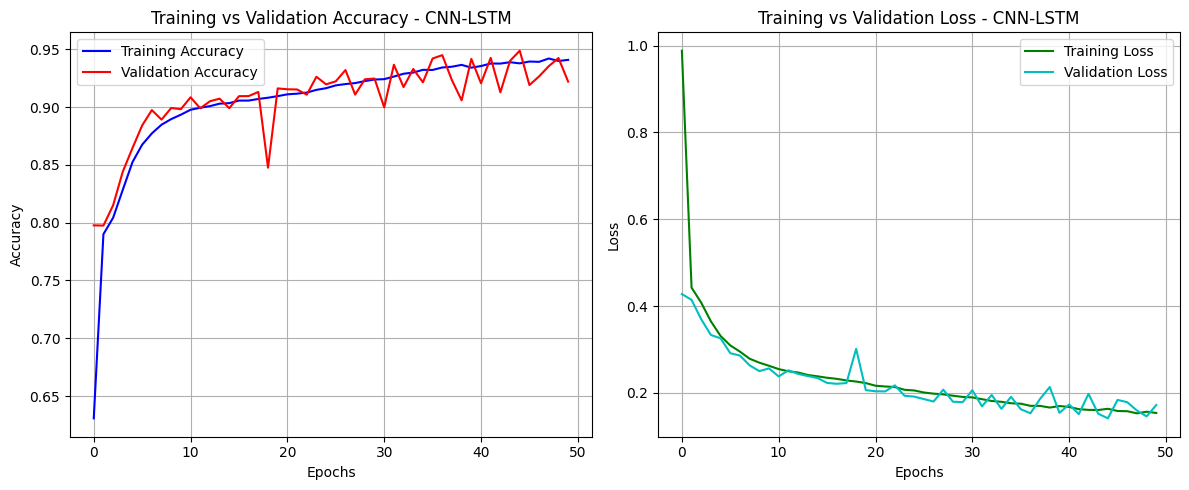

In [ ]:
plot_training_vs_validation(cnn_history,"CNN-LSTM")

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_normalized_df, Y_encoded, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)

X_train_selected_reshaped = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val_selected_reshaped = X_val.values.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test_selected_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

cnn_lstm_model = Sequential()
cnn_lstm_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_selected_reshaped.shape[1], 1)))
cnn_lstm_model.add(MaxPooling1D(pool_size=2))
cnn_lstm_model.add(LSTM(units=200, activation='relu', return_sequences=True))
cnn_lstm_model.add(Dropout(0.35))
cnn_lstm_model.add(LSTM(units=100, activation='relu'))
cnn_lstm_model.add(Dropout(0.25))
cnn_lstm_model.add(Dense(units=20, activation='softmax'))

adam_optimizer = Adam(learning_rate=0.0002)

cnn_lstm_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=adam_optimizer,
    metrics=['accuracy']
)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10),
    ModelCheckpoint(filepath='best_model_cnn_lstm.h5', monitor='val_loss', save_best_only=True)
]

cnn_lstm_history = cnn_lstm_model.fit(
    X_train_selected_reshaped, Y_train,
    epochs=50,
    batch_size=256,
    validation_data=(X_val_selected_reshaped, Y_val),
    callbacks=callbacks
)

Epoch 1/50
299/299 [==============================] - 111s 359ms/step - loss: 0.7786 - accuracy: 0.7043 - val_loss: 0.4179 - val_accuracy: 0.8014
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


299/299 [==============================] - 108s 361ms/step - loss: 0.4165 - accuracy: 0.8024 - val_loss: 0.4040 - val_accuracy: 0.8563
Epoch 3/50
299/299 [==============================] - 105s 351ms/step - loss: 0.3496 - accuracy: 0.8429 - val_loss: 0.3152 - val_accuracy: 0.8593
Epoch 4/50
299/299 [==============================] - 107s 357ms/step - loss: 0.3212 - accuracy: 0.8594 - val_loss: 0.2970 - val_accuracy: 0.8755
Epoch 5/50
299/299 [==============================] - 106s 355ms/step - loss: 0.3070 - accuracy: 0.8660 - val_loss: 0.3245 - val_accuracy: 0.8674
Epoch 6/50
299/299 [==============================] - 107s 358ms/step - loss: 0.2913 - accuracy: 0.8746 - val_loss: 0.2680 - val_accuracy: 0.8872
Epoch 7/50
299/299 [==============================] - 106s 355ms/step - loss: 0.2788 - accuracy: 0.8820 - val_loss: 0.2695 - val_accuracy: 0.9031
Epoch 8/50
299/299 [==============================] - 104s 348ms/step - loss: 0.2664 - accuracy: 0.8887 - val_loss: 0.2582 - val_accura

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

y_pred_probs = cnn_lstm_model.predict(X_test_selected_reshaped)
y_pred = np.argmax(y_pred_probs, axis=1)

print("\nClassification Report:\n", classification_report(Y_test, y_pred))


NameError: name 'cnn_lstm_model' is not defined

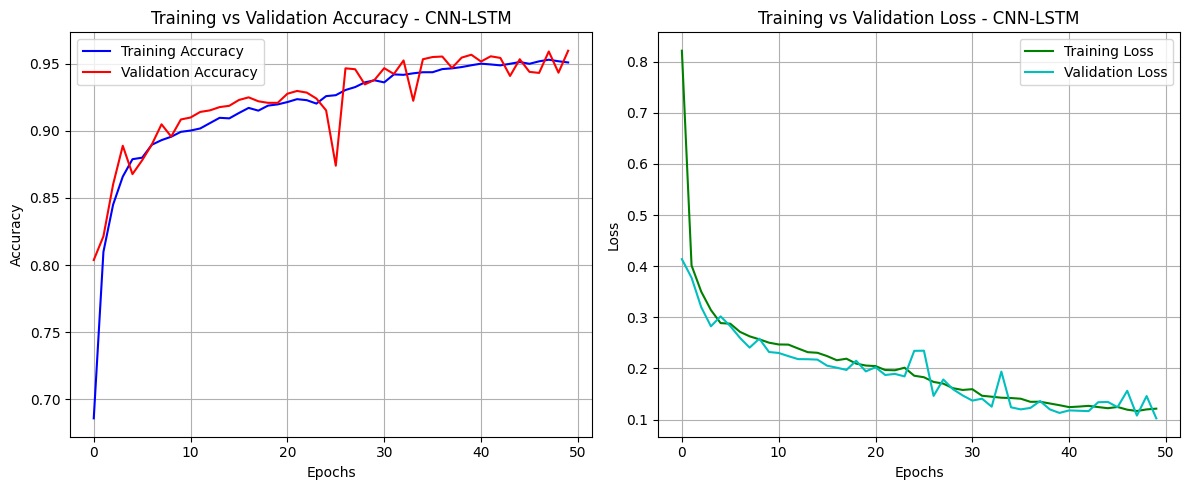

In [ ]:
plot_training_vs_validation(cnn_lstm_history,"CNN-LSTM")

In [ ]:
def evaluate_model(model, X_train, Y_train, X_val, Y_val, X_test, Y_test):
    X_train_reshaped = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_val_reshaped = X_val.values.reshape((X_val.shape[0], X_val.shape[1], 1))
    X_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

    train_loss, train_accuracy = model.evaluate(X_train_reshaped, Y_train)
    print(f'Training Loss: {train_loss:.4f}')
    print(f'Training Accuracy: {train_accuracy:.4f}')

    val_loss, val_accuracy = model.evaluate(X_val_reshaped, Y_val)
    print(f'Validation Loss: {val_loss:.4f}')
    print(f'Validation Accuracy: {val_accuracy:.4f}')

    test_loss, test_accuracy = model.evaluate(X_test_reshaped, Y_test)
    print(f'Test Loss: {test_loss:.4f}')
    print(f'Test Accuracy: {test_accuracy:.4f}')

In [ ]:
evaluate_model(cnn_lstm_model, X_train, Y_train, X_val, Y_val, X_test, Y_test)

2390/2390 [==============================] - 73s 30ms/step - loss: 0.0995 - accuracy: 0.9599
Training Loss: 0.0995
Training Accuracy: 0.9599
513/513 [==============================] - 16s 30ms/step - loss: 0.1024 - accuracy: 0.9596
Validation Loss: 0.1024
Validation Accuracy: 0.9596
513/513 [==============================] - 15s 30ms/step - loss: 0.1021 - accuracy: 0.9599
Test Loss: 0.1021
Test Accuracy: 0.9599


In [ ]:
evaluate_model(cnn_model, X_train, Y_train, X_val, Y_val, X_test, Y_test)

2390/2390 [==============================] - 29s 12ms/step - loss: 0.1601 - accuracy: 0.9352
Training Loss: 0.1601
Training Accuracy: 0.9352
513/513 [==============================] - 6s 12ms/step - loss: 0.1552 - accuracy: 0.9362
Validation Loss: 0.1552
Validation Accuracy: 0.9362
513/513 [==============================] - 7s 14ms/step - loss: 0.1549 - accuracy: 0.9378
Test Loss: 0.1549
Test Accuracy: 0.9378
